<h2><center>Визуализация данных в Python</center></h2> 

**Задание:**
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек.
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель 
(например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Для выполнения задания был выбран следующий датасет: <br>
**Student Alcohol Consumption** (https://www.kaggle.com/uciml/student-alcohol-consumption) <br>
Данные получены из опроса студентов следюущих курсов математичского и португальского языка в средней школе. В нашем исследовании расмотрим только студентов математчиеского курса. Часть полей была удалена из датасета. <br><br>
Краткое описание переменных датасета:<br>
**school** - школа студента: ('GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira) <br>
**sex** - пол студенат ('F' - женский or 'M' - мужской)<br>
**age** - возраст студента (число от 15 до 22)<br>
**address** - место проживания студента ('U' - в городе или 'R' - в сельской местности)<br>
**famsize** - размер семьи ('LE3' - меньше или равно 3 or 'GT3' - больше 3)<br>
**Pstatus** - проживание родителей ('T' - живут вместе or 'A' - раздельно)<br>
**Medu** - образование матери (число: 0 - нет, 1 - начальная школа (4 класса), 2 – с 5 по 9 класс, 3 – средняя школа or 4 – высшее образование)<br>
**Fedu** - образование отца (число: 0 - нет, 1 - начальная школа (4 класса), 2 – с 5 по 9 класс, 3 – средняя школа or 4 – высшее образование)<br>
**traveltime** - время в пути до дома (число: 1 - <15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - >1 часа)<br>
**studytime** - время обучения в неделю (число: 1 - <2 часов, 2 - 2 до 5 часов, 3 - 5 до 10 часов, или 4 - >10 часов)<br>
**failures** - кол-во неудачных сдач эказменов (число: n если 1<=n<3, иначе 4)<br>
**higher** - желание получить высшее образование (yes или no)<br>
**internet** - Интернет дома (yes или no)<br>
**romantic** - есть ли отношения (yes или no)<br>
**freetime** - свободное время после школы(число: от 1 - очень мало до 5 - очень много)<br>
**goout** - прогулки с друзьями (число: от 1 - очень мало до 5 - очень много)<br>
**Dalc** - употребления алкоголя в будение дни (число: от 1 - очень мало до 5 - очень много)<br>
**Walc** - употребления алкоголя в выходные дни (число: от 1 - очень мало до 5 - очень много)<br>
**health** - состояние здоровья (число: от 1 - очень плохое до 5 - очень хорошее)<br>
**absences** - кол-во пропусков в школе (число: от 0 до 93)<br>
**G1** - оценка первого периода (число: от 0 до 20)<br>
**G2** - оценка второго периода (число: от 0 до 20)<br>
**G3** - финальная оценка (число: от 0 до 20)<br>


Экспортируем данные из csv файла. Проверим данные на наличие пустых значений.

In [1]:
import pandas as pd
data = pd.read_csv('student-mat.csv')
print(data.shape)
data.info()

(395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc      

Солгасно данному результату датасет не содержит пустых значений. Немного сократим исходный датасет.

In [2]:
data = data.drop(['Mjob', 'Fjob','reason','guardian','famrel','schoolsup','famsup','paid','activities','nursery'], axis=1)
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,2,2,...,no,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,1,2,...,no,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,1,2,...,no,3,2,2,3,3,10,7,8,10


Импортируем необходимые библиотеки и установим настройки

In [3]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


**График 1.** С использованием библиотеки Matplotlib построим гистограмму возраста учеников. В анализе участвует дискретная целая переменная, цель данной визуализации посмотреть как распределен возраст учеников в исследуемом датасете. Для этих целей подходит диаграмма.

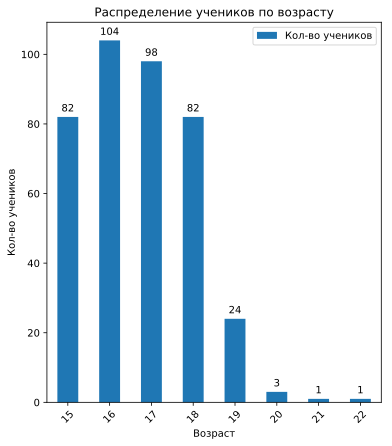

In [4]:
rcParams['figure.figsize'] = 6,7
df1=data[['school','age']].groupby(['age']).count().reset_index()
age_plot=df1.plot('age',kind='bar', rot=45);
age_plot.set_xlabel('Возраст')
age_plot.set_ylabel('Кол-во учеников')
age_plot.set_title('Распределение учеников по возрасту')
age_plot.legend(['Кол-во учеников'])
rects = age_plot.patches
for i in rects:
    age_plot.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, '{:.0f}'.format(i.get_height()),
            ha='center', va='bottom')
    

In [6]:
rcParams['figure.figsize'] = 6,3

**Таблица 1.** Построим корреляцию между всеми переменными в наборе данных. Для выявления наиболее зависимых переменных используем корреляционную матрицу между всеми переменными датасета, также добавим стиль на таблицу для более удобного определения наиболее коррелируемых значений.

In [7]:
corr = data.corr()
corr.style.background_gradient()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1,-0.163658,-0.163438,0.0706407,-0.00414004,0.243665,0.0164344,0.126964,0.131125,0.117276,-0.0621874,0.17523,-0.0640815,-0.143474,-0.161579
Medu,-0.163658,1,0.623455,-0.171639,0.0649441,-0.23668,0.0308909,0.0640944,0.0198341,-0.0471235,-0.0468778,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1,-0.158194,-0.00917464,-0.250408,-0.0128455,0.0431047,0.00238643,-0.012631,0.0147415,0.0244729,0.19027,0.164893,0.152457
traveltime,0.0706407,-0.171639,-0.158194,1,-0.100909,0.0922387,-0.0170249,0.0285397,0.138325,0.134116,0.00750061,-0.0129438,-0.09304,-0.153198,-0.117142
studytime,-0.00414004,0.0649441,-0.00917464,-0.100909,1,-0.173563,-0.143198,-0.0639037,-0.196019,-0.253785,-0.0756159,-0.0627002,0.160612,0.13588,0.0978197
failures,0.243665,-0.23668,-0.250408,0.0922387,-0.173563,1,0.0919875,0.124561,0.136047,0.141962,0.0658273,0.0637258,-0.354718,-0.355896,-0.360415
freetime,0.0164344,0.0308909,-0.0128455,-0.0170249,-0.143198,0.0919875,1,0.285019,0.209001,0.147822,0.0757334,-0.0580779,0.0126129,-0.0137771,0.0113072
goout,0.126964,0.0640944,0.0431047,0.0285397,-0.0639037,0.124561,0.285019,1,0.266994,0.420386,-0.00957725,0.0443022,-0.149104,-0.16225,-0.132791
Dalc,0.131125,0.0198341,0.00238643,0.138325,-0.196019,0.136047,0.209001,0.266994,1,0.647544,0.0771796,0.111908,-0.0941588,-0.0641202,-0.05466
Walc,0.117276,-0.0471235,-0.012631,0.134116,-0.253785,0.141962,0.147822,0.420386,0.647544,1,0.0924763,0.136291,-0.126179,-0.0849274,-0.0519393


**График 2.** С использованием библиотеки Seaborn построим график (boxplot) суммарного потребления алкоголя мужчинами и женщинами. В анализе участвуют две дискретные переменные, цель данной визцализации сравнить медианные значения употребления алкоголя мужчинами и женщинами и выявить наличие выбросов в даных подгруппах. Для этой цели подходит график boxplot.

[Text(0,0.5,'Потребление алкоголя'), Text(0.5,0,'Пол')]

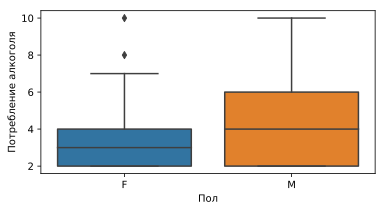

In [8]:
data['Alchol_cons']=data['Dalc']+data['Walc']
data.head()
sns.boxplot(x='sex', y='Alchol_cons',data=data).set(xlabel='Пол',ylabel='Потребление алкоголя')

**График 3.** С использованием библиотеки Seaborn построим график распредления кол-ва отсутсвий студентов. В анализе участвует дискретная целая переменная (кол-во отсутсвий), цель данной визуализации посмотреть как распредлено количество отсутствий студентов в исследуемом датасете. Для этих целей подходит диаграмма.

(0, 85.01857055231284)

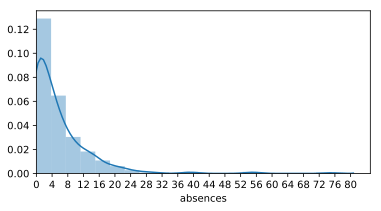

In [37]:
sns.distplot(data.absences, bins=20);
import matplotlib.pyplot as plt
xtick=[i for i in range (0,84,4)]
plt.xticks(xtick)
plt.xlim(0,None)

**График 5.** С использованием библиотеки Plotly построим график (Scaterplot) суммарного потребления алкоголя/количеством пропусков занятий и финальных оценок студенов. В анализе участвует три дискретных целых переменных, цель данной визуализации показать как кол-во пропусков занятий и употреблений алкоголя оказывает влияние на итоговую оценку. Для этих целей выбран scatter plot отоброжающий зависимости между двумя переменными.

In [9]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

absences_g3 = data.groupby('G3')[['absences']].sum().reset_index()
Alchol_cons_g3 = data.groupby('G3')[['Alchol_cons']].sum().reset_index()

trace0 = go.Scatter(
    x=absences_g3.G3,
    y=absences_g3.absences,
    name='Кол-во пропусков',
    mode = 'markers+lines'
)

trace1 = go.Scatter(
    x=Alchol_cons_g3.G3,
    y=Alchol_cons_g3.Alchol_cons,
    name='Суммарное потребления алкоголя',
    mode = 'markers+lines'
)

data_plt = [trace0, trace1]
layout = {'title': 'Связь финальной оценки с количеством пропусков и суммарным потреблением алкоголя'}

fig = go.Figure(data=data_plt, layout=layout)

iplot(fig, show_link=False)


**График 6.** С использованием библиотеки Plotly построим распределение оценок студентов живущих в сельской местности и в городе. В анализе участвуют две дискретные целые переменные, цель данной визуализации посмотреть распределение оценок в зависимости от места жительства. Для этих целей выбран scatter plot отображающий зависимости между двумя переменными (с возможностью выбора типа места проживания (сельская местность или город)).

In [52]:
traces = []
for address_ in ['U', 'R']:
    traces.append(
        go.Histogram(
            x=data[data.address== address_].G3,
            histnorm='probability', 
            name = address_, 
            visible = (address_ == 'U'))
    )
    
layout = go.Layout(
    title='Распределение оценок в зависимости от места проживания',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]],
                    label='Город',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True]],
                    label='Сельская местность',
                    method='restyle'
                ),
                
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)